El objetivo de este código es poder adquirir el conocimiento en python, para trasladar todo lo que sé de matlab 
a este lenguaje de programación.

## Puntos a tratar:
- ### Librerías más utilizadas
- ### Funciones típicas
- ### ¿Qué cosas sé hacer en matlab?
- ### Traslado de programas a python

## Librerías:

Para comenzar utilizaré 2 principales: Numpy y matplotlib. A medida que se exploren más funciones se irán añadiendo librerías para tareas específicas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Para crear vectores se hace uso de la función np.array( ), donde todo el arreglo debe ir entre [ ]. Si se añade más de una fila, simplemente se agregan separadas por una coma:

In [11]:
matriz=np.array([[1,3,4],[2,0,1],[1,4,2]])
print(matriz)

[[1 3 4]
 [2 0 1]
 [1 4 2]]


Para referirse a los elementos del arreglo, se usan índices entre [ ], y van indexados desde 0 a n-1. En este caso la matriz tiene dimensión 3x3:

In [13]:
matriz[2,1]

4

Esto muestra el elemento de la fila 3 (índice 2) y columna 2 (índice 1).

## find en Python
En matlab, la función find, permite encontrar los índices de un arreglo que cumple cierta condición. 
En python la función que logra esto es "where". 

In [16]:
a,b=np.where(matriz<=1)
print(a,b)

[0 1 1 2] [0 1 2 0]
[1 0 1 1]


Los índices de "a" son las filas y "b" las columnas, en las cuales existía un número menor o igual a 1.

## encontrar -9999 y reemplazarlos por NaN

In [28]:

data=np.array([1,3,5,-9999,1,4,2,-9999,2,1,4,0,0,-9999],dtype=float)
idx=np.where(data==-9999)
print(idx)
data[idx]=np.nan
print(data)

(array([ 3,  7, 13]),)
[ 1.  3.  5. nan  1.  4.  2. nan  2.  1.  4.  0.  0. nan]


Notar que se define "data" de tipo flotante, ya que "np.nan" es un valor flotante. 

## Gráficos utilizando matplotlib
De la librería matplotlib.pylot se utiliza la función plot para realizar un gráfico 2D. Se le ingresa un vector x e y, de mismas dimensiones:
Ejemplo graficar $$y=\frac{\sqrt(x)}{cos(x)}$$
con $x\in [0,10]$

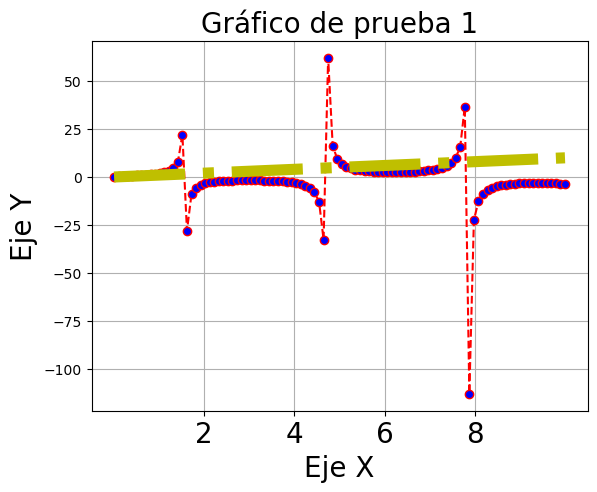

In [51]:
x=np.linspace(0,10,100) # Define un vector con 100 valores equidistantes entre 0 y 10.
y=np.sqrt(x)/np.cos(x) # Calcula y en función de los valores de x.
plt.plot(x,y,marker='o',color='r',markerfacecolor='b',linestyle='--') #Se definen distintas propiedades de los puntos graficados
plt.title('Gráfico de prueba 1',fontsize=20) # Título y 
plt.grid()
plt.xlabel("Eje X",fontsize=20) #Etiqueta del eje y tamaño de la letra
plt.ylabel('Eje Y',fontsize=20)
plt.xticks([2,4,6,8],fontsize=20)
plt.plot(x,x,linewidth=8,linestyle='-.',color='y') #Superposición de otro gráfico.


Los gráficos son iguales a MATLAB, se puede modificar cada variable por separa y son muy modificables. La única diferencia es el llamar la librería de matplotlib usando la abreviatura plt. Esto se puede evitar cargando toda la librería como from "matplotlib.pyplot import \*". De esta forma todas las funciones están cargadas por defecto. Sin embargo ocuparán un poco más recursos computacionales.

## Representación de variables F(x,y)
Gráficos de calor, contorno son útiles para representar una tercera dimensión en variables escalares que dependen de dos variables espaciales. Por ejemplo temperatura, magnitud del viento, flujo de calor, presión, etc.

Graficar un campo de presión dado por la función: $$P(x,y)=e^{-\frac{1}{30}(x^2+y^2)}$$ 

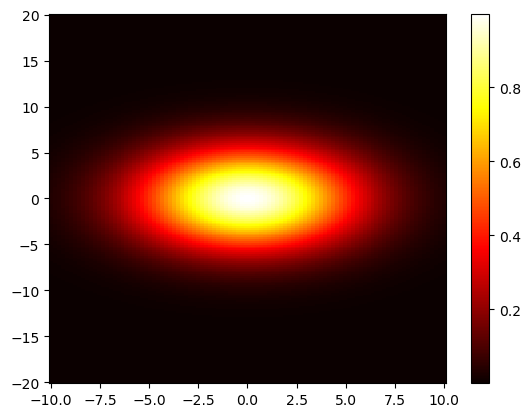

In [74]:
x=np.linspace(-10,10,100)
y=np.linspace(-20,20,200)
X,Y=np.meshgrid(x,y) # crea una grilla con los vectores x e y para cada punto. del mapa.
P=np.exp(-(1/30)*(X**2+Y**2)) # Función que define el campo de presión
plt.pcolormesh(x,y,P,cmap='hot') # cmap define la paleta de colores
plt.colorbar() # crea la barra de colores al costado


Se pueden usar distintas funciones que realizan esto. Entre ellas
- plt.contourf --> contornos coloreados
- plt.contourf --> lineas de contornos
- plt.pcolornesh --> asigna un color a cada pixel.

## Series de tiempo
En MATLAB se hace uso de la función datenum - datetime para manejar bases de datos temporales.
Para realizar esta tarea en python se importa la librería datetime:

In [55]:
import datetime as dt
fecha=dt.datetime(1990,1,1,1,1,1) # Se le ingresa (año,mes,dia,hora,minuto,segundo)
print(fecha)

1990-01-01 01:01:01


Se puede extraer cada elemento de la fecha, ya que en la variable fecha, se guardan atributos como:

In [46]:
[fecha.year, fecha.month, fecha.day, fecha.hour, fecha.minute]

[1990, 1, 1, 1, 1]

Además se puede expresar esta fecha en un número asociado a cuantos días han pasado desde cierto momento (al igual que el formato datenum de matlab)

In [49]:
print(dt.date.toordinal(fecha))

726468


In [54]:
dt.date(1990,1,2)-dt.date(1990,1,1) # Diferencia entre dos días consecutivos.

1

## Ejemplo: gráfica de una serie temporal

Se usará una serie temporal de como ha ido evolucionando la cantidad de CO2 en la atmósfera desde 1989 hasta 2019.
La información está presentada en un archivo csv, donde son 13 columnas, donde la primera es el año y las 12 siguientes los meses, desde enero a diciembre, y misma cantidad de filas como de años.

Para leer los archivos se hará uso de la librería pandas, la  cual tiene una función para leer archivos csv.

Text(0, 0.5, 'CO2 [ppm]')

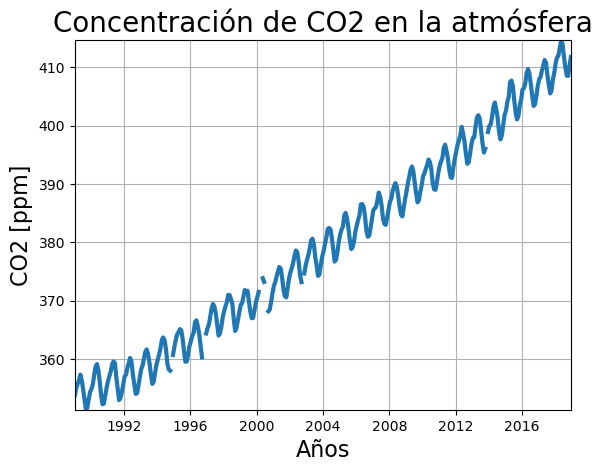

In [56]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('CO2.csv') #Esto carga una matriz de 30 filas y 13 columnas.

#Al leer con la librería de pandas, el formato no es array, por lo que se transforma en array de numpy
data=np.array(data) 
# Ahora es necesario en una columna de 30*12 (nro de datos) fila, con los datos de CO2.
co2=[] #Se define un vector vacio de co2 y fechas
fechas=[]
c=0 #Contador
t=0 #Contador de años.
for i in np.arange(0,30): # i toma valores de 0 a 29, que son los índices de las filas
    for j in np.arange(1,13): # j toma valores de 1 a 12, que son los índices de las columnas. Los índices de python parten de 0.
        co2.append(data[i,j])
        fechas.append(dt.date(1989+t,j,15)) #Por cada iteración de i, avanzará un año, y por cada iteración de j un mes.
        c=c+1
    t=t+1
plt.plot(fechas,co2,linewidth=3)
plt.grid()
plt.autoscale(tight='True') #axis tight en matlab
plt.title('Concentración de CO2 en la atmósfera',fontsize=20)
plt.xlabel('Años',fontsize=16)
plt.ylabel('CO2 [ppm]',fontsize=16)


Realizar media móvil de la serie temporal anterior:

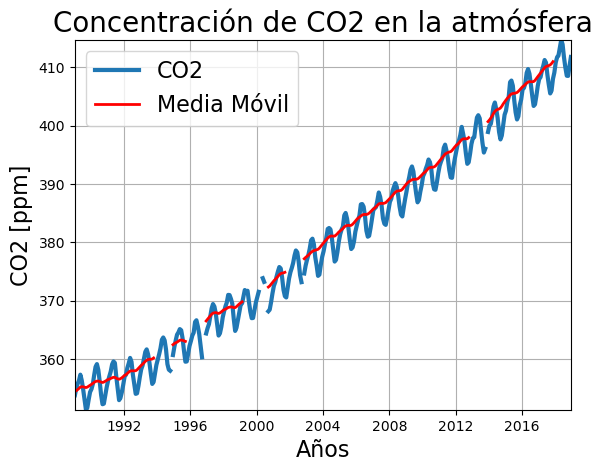

In [91]:
m=13 #ancho de la media movil
serie_filtrada=[]
for i in np.arange(0,np.size(co2)-m):
    serie_filtrada.append(np.mean(co2[i:i+m])) 

plt.plot(fechas,co2,linewidth=3,label='CO2')
plt.plot(fechas[0:-m],serie_filtrada,color='r',linewidth=2,label='Media Móvil')
plt.grid()
plt.autoscale(tight='True') #axis tight en matlab
plt.title('Concentración de CO2 en la atmósfera',fontsize=20)
plt.xlabel('Años',fontsize=16)
plt.ylabel('CO2 [ppm]',fontsize=16)
plt.legend(fontsize=16)